### Matrices 

## 1.
Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.
La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.



In [127]:
import numpy as np 
from sympy import Matrix as M
A = np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
M(A)

Matrix([
[ 1,  2, -3,  4,  5],
[-2, -5,  8, -8, -9],
[ 1,  2, -2,  7,  9],
[ 1,  1,  0,  6, 12],
[ 2,  4, -6,  8, 11]])

In [128]:
mensaje = np.matrix([
    [47,49,-19,257,487],
    [10,-9,63,137,236], 
    [79,142,-184,372,536],
    [59,70,-40,332,588]])
M(mensaje)

Matrix([
[47,  49,  -19, 257, 487],
[10,  -9,   63, 137, 236],
[79, 142, -184, 372, 536],
[59,  70,  -40, 332, 588]])

In [129]:
abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16',
     '17','18','19','20','21','22','23','24','25','26','27']

In [130]:
dec = mensaje@A.I
dec =  np.round(dec)
dec = dec.astype('int')
M(dec)

Matrix([
[ 1, 18,  5, 27, 25],
[15, 21, 27,  8,  1],
[22,  9, 14,  7, 27],
[ 6, 21, 14, 27, 27]])

In [131]:
mensaje = ''
r,c = dec.shape
for i in range (0,r):
    for j in range (0,c):
        indice = dec[i,j]
        mensaje = mensaje + abc[indice-1]
print('El mensaje decodificado es : \n', mensaje)

El mensaje decodificado es : 
 ARE YOU HAVING FUN  


# 2. 
Construir un programa que permita realizar la multiplicacion de dos matrices. El programa debe establecer si las matrices se pueden multiplicar.


In [639]:
def matmultipli(A,B):
    r1, c1 = np.shape(A)
    r2, c2 = np.shape(B) 
    
    if c1 != r2:
        print('Las matrices no se pueden multiplicar')
        return np.nan
    else:
        AB = np.zeros((r1,c2))
        
        for i in range(0,r1):
            for j in range(0,c2):
                    AB[i,j] = (A[i,:]*B[:,j]).sum()
        return AB

A = np.array([
    [2,2,3],
    [1,2,5],
    [1,4,7]])

B = np.array([
    [2,2,3,1,4],
    [1,2,5,4,7],
    [1,4,7,5,-6]])


In [640]:
matmultipli(A,B)

array([[  9.,  20.,  37.,  25.,   4.],
       [  9.,  26.,  48.,  34., -12.],
       [ 13.,  38.,  72.,  52., -10.]])

In [642]:
A@B

array([[  9,  20,  37,  25,   4],
       [  9,  26,  48,  34, -12],
       [ 13,  38,  72,  52, -10]])

In [652]:
A = np.array([
    [2,2,3,5],
    [1,2,5,6],
    [1,4,7,1]])

B = np.array([
    [2,2,3,1,4],
    [1,2,5,4,7],
    [1,4,7,5,-6],
    [1,3,4,5,6]])


In [653]:
matmultipli(A,B)

array([[14., 35., 57., 50., 34.],
       [15., 44., 72., 64., 24.],
       [14., 41., 76., 57., -4.]])

In [654]:
A@B

array([[14, 35, 57, 50, 34],
       [15, 44, 72, 64, 24],
       [14, 41, 76, 57, -4]])

# 3. 
Regresión lineal: 1D

Para los datos generados en el siguiente dataframe realizar una regresión lineal, empleando la siguiente ecuación.


$\Theta = (X^T X)^{-1} X^T y$

Los parametros theta se corresponden con la siguiente ecuacion de la recta:


$y = \theta^T X =\theta_0 + \theta_1 x_1$

Text(0, 0.5, 'Y')

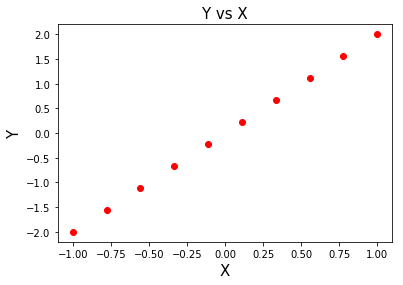

In [141]:
import pandas as pd
from matplotlib import pyplot as plt
N = 10
x1 = np.linspace(-1, 1, N)
y = 2*x1
df = pd.DataFrame({"Y":y, "X1":x1})
df["ones"] = np.ones(N)

plt.plot(df.X1,df.Y,"ro")
plt.title('Y vs X', size=15)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)

In [140]:
X = np.matrix(df[ ["ones","X1"] ])
y = np.array([df["Y"]])
Y  = np.matrix(np.transpose(y))

In [169]:
θ = np.array((X.T@X).I@X.T@Y)
θ

array([[-5.55111512e-17],
       [ 2.00000000e+00]])

In [185]:
y_r = lambda x: θ[0] + θ[1]*x
x = np.array(df.X1)

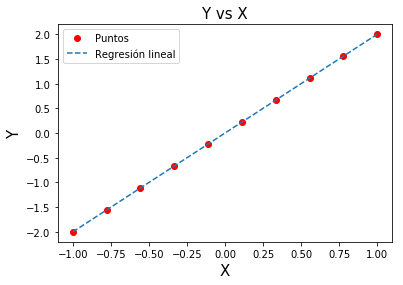

In [186]:
plt.plot(df.X1,df.Y,"ro",label='Puntos')
plt.plot(x,y_r(x),'--',label='Regresión lineal')
plt.title('Y vs X', size=15)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.legend()

### 4.
Regresión lineal 2D:
La ecuación anterior puede ser aplicada a sistemas n-dimensionales, como se describie en el siguiente ejercicio. Suponga que se tiene un sistema físico con dos caracteristiacs X1,X2 que se corresponden con un predicción Y.
Encontrar el plano que ajusta los datos, para los datos sinteticos dados mas abajo , a través de:

\begin{equation}
\Theta = (X^T X)^{-1} X^T y
\end{equation}

Construya el plano en 3D, donde se evidencia los puntos y el plano de ajustes.

$y = \theta^T X =\theta_0 + \theta_1 X_1+ \theta_2 X_2$

Text(0.5, 0, 'Y1')

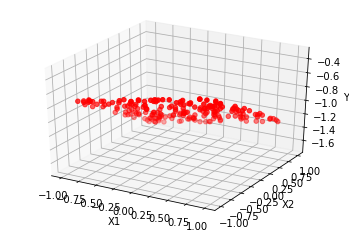

In [209]:
from mpl_toolkits.mplot3d import Axes3D
N = 200
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-1, 1, N)

X1, X2 = np.meshgrid(x1,x2)
Y = 0.2*X1 - 0.5*X2 - 1.0

# Ecuaciones parametricas del mismo plano:
alpha = 2*np.random.random(N)-1
beta  = 2*np.random.random(N)-1
x1 = alpha
x2 = beta
y = 0.2*alpha - 0.5*beta - 1.0

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="red")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

In [210]:
# Regresion bi-lineal
df = pd.DataFrame({"Y":y, "X1":x1,"X2":x2})
df["ones"] = np.ones(N)

X = np.matrix(df[ ["ones","X1","X2"] ])
y = np.array([df["Y"]])
Y  = np.matrix(np.transpose(y))



In [211]:
θ = np.array((X.T@X).I@X.T@Y)
θ

array([[-1. ],
       [ 0.2],
       [-0.5]])

In [221]:
y_r = lambda x1,x2: θ[0] + θ[1]*x1 + θ[2]*x2

Text(0.5, 0, 'Y1')

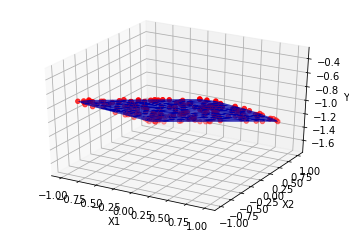

In [229]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="red")
surf1 = ax.plot_trisurf(x1, x2, y_r(x1,x2),color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

# 5 
Se sabe que un sistema físico es gobernado por las ecuaciones,

\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}


donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como  $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general $\mathbf{r} = e^{At} \mathbf{r}(0)$.


### a) Diagonalize $A$.




In [449]:
A = np.array([[2,-1,1],
    [0,3,-1],
    [2,1,3]])
# A no es una matriz simétrica, sin embargo, podemos diagonalizarla usando el proceso general para diagonalizar cualquier matriz
# que es el método SVD

V,λ,U_dagger = np.linalg.svd(A)
U = U_dagger.T.conj()
M(λ)

Matrix([
[4.21043378740709],
[3.30967408612351],
[1.14817453616744]])

In [450]:
M(U)

Matrix([
[ 0.631037606264051,  0.123646587946952, -0.765834878266597],
[-0.114053274139521,  0.991275484479419,  0.066066364574934],
[ 0.767322220542708, 0.0456556147606123,   0.63963440706566]])

In [451]:
M(V)

Matrix([
[ 0.509080730261366, -0.210995607317585,  -0.83445650801539],
[-0.263507775916011,  0.884730871524361, -0.384467081820463],
[ 0.819390299007958,  0.415610561300394,  0.394800454948091]])

Veamos que 
$V^{T}AU = A_{diag}$

In [452]:
A_diag = np.diag(λ)
M(A_diag)

Matrix([
[4.21043378740709,                0,                0],
[               0, 3.30967408612351,                0],
[               0,                0, 1.14817453616744]])

In [453]:
M(np.round(V.T@A@U,14))

Matrix([
[4.21043378740709,                0,                0],
[               0, 3.30967408612351,                0],
[               0,                0, 1.14817453616744]])

Entonces A se puede escribir como: 
$A = V A_{diag} U^{T}$




In [457]:
M(np.round(V@A_diag@U.T,14))

Matrix([
[2.0, -1.0,  1.0],
[  0,  3.0, -1.0],
[2.0,  1.0,  3.0]])

In [458]:
M(A)

Matrix([
[2, -1,  1],
[0,  3, -1],
[2,  1,  3]])

### b) Use el hecho de que  $f(A) = U f(D) U^{-1}$ para encontrar  x(t), y(t), z(t) en el intervalo de tiempo [0,2]  y  c) Grafique $x(t),y(t),z(t)$  use la condición inicial $\mathbf{r}(0)=(1,1,2)$

En este caso y con la notación que estamos usando tendriamos entonces que $f(A) = V f(A_{diag}) U^{T}$ 

$V,U$ son ortogonales entonces podemos usar tanto $U^{-1}$ como $U^{T}$ ya que $U^{-1}=U^{T}$

In [564]:
def xyz(t):
    r0 = np.array([1,1,2])
    lista=[]
    try:
        
        for i in t:
            r = V @ np.diag(np.exp(λ*i)) @ U.T
            lista.append(r@r_0)
        return lista
    
    except:
        r = V @ np.diag(np.exp(λ*t)) @ U.T
        return r@r0


In [581]:
t = np.linspace(0,2,100)
values = np.array(xyz(t))

Text(0.5, 1.0, 'x(t) vs t')

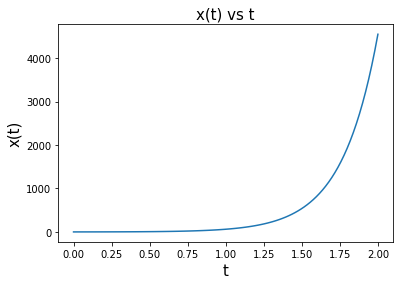

In [582]:
plt.plot(t,values[:,0])
plt.xlabel('t',size=15)
plt.ylabel('x(t)',size=15)
plt.title('x(t) vs t',size=15)

Text(0.5, 1.0, 'y(t) vs t')

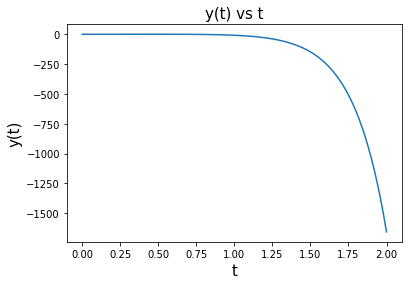

In [583]:
plt.plot(t,values[:,1])
plt.xlabel('t',size=15)
plt.ylabel('y(t)',size=15)
plt.title('y(t) vs t',size=15)

Text(0.5, 1.0, 'z(t) vs t')

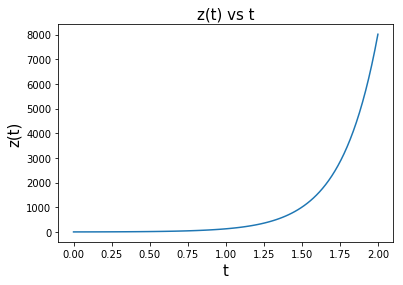

In [584]:
plt.plot(t,values[:,2])
plt.xlabel('t',size=15)
plt.ylabel('z(t)',size=15)
plt.title('z(t) vs t',size=15)

### d) Compare el resultado a la solución analítica

In [585]:
r0 = np.array([1,1,2])
def x(t):
    term1 =  r_0[0] * np.exp(2*t) * (1 + np.exp(2*t) - 2*t) 
    term2 =  r_0[1] * (-2*t*np.exp(2*t))
    term3 =  r_0[2] * np.exp(2*t) * (-1+np.exp(2*t))
    
    return (1/2) * (term1 + term2 + term3)

def y(t):
    term1 =  r_0[0] * -np.exp(2*t) * (-1 + np.exp(2*t) - 2*t) 
    term2 =  r_0[1] * 2*((t+1)*np.exp(2*t))
    term3 =  r_0[2] * -np.exp(2*t) * (-1+np.exp(2*t))
    
    return (1/2) * (term1 + term2 + term3)

def z(t):
    term1 =  r_0[0] * np.exp(2*t) * (-1 + np.exp(2*t) + 2*t) 
    term2 =  r_0[1] * (2*t*np.exp(2*t))
    term3 =  r_0[2] * np.exp(2*t) * (1+np.exp(2*t))
    
    return (1/2) * (term1 + term2 + term3)

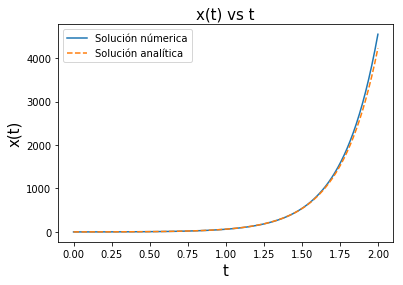

In [586]:
plt.plot(t,values[:,0], label='Solución númerica')
plt.plot(t,x(t),'--',label='Solución analítica')
plt.xlabel('t',size=15)
plt.ylabel('x(t)',size=15)
plt.title('x(t) vs t',size=15)
plt.legend()

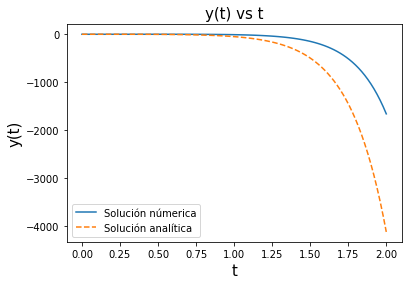

In [587]:
plt.plot(t,values[:,1], label='Solución númerica')
plt.plot(t,y(t),'--',label='Solución analítica')
plt.xlabel('t',size=15)
plt.ylabel('y(t)',size=15)
plt.title('y(t) vs t',size=15)
plt.legend()

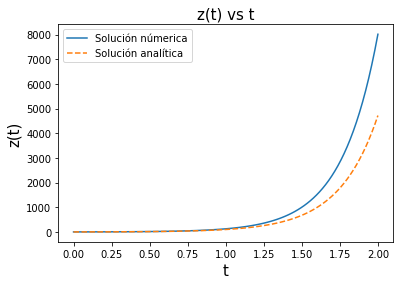

In [588]:
plt.plot(t,values[:,2], label='Solución númerica')
plt.plot(t,z(t),'--',label='Solución analítica')
plt.xlabel('t',size=15)
plt.ylabel('z(t)',size=15)
plt.title('z(t) vs t',size=15)
plt.legend()